In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data =pd.read_csv ('./auto.csv')
plt.xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x1ccbd7f5f98>

In [2]:
data.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [3]:
print(data['origin'].unique())

['US' 'Asia' 'Europe']


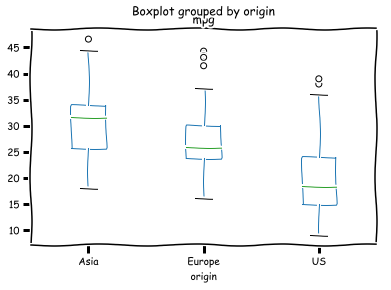

In [4]:
data.boxplot('mpg','origin')

In [5]:
dfo=pd.get_dummies(data)
dfo.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [6]:
dfo.drop('origin_US',axis=1,inplace=True)
dfo.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe
0,18.0,250.0,88,3139,14.5,15.0,0,0
1,9.0,304.0,193,4732,18.5,20.0,0,0
2,36.1,91.0,60,1800,16.4,10.0,1,0
3,18.5,250.0,98,3525,19.0,15.0,0,0
4,34.3,97.0,78,2188,15.8,10.0,0,1


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=dfo.drop('mpg',axis=1).values
y=dfo['mpg'].values
print(x[:10])
print('\n\n',y[:10])

[[2.500e+02 8.800e+01 3.139e+03 1.450e+01 1.500e+01 0.000e+00 0.000e+00]
 [3.040e+02 1.930e+02 4.732e+03 1.850e+01 2.000e+01 0.000e+00 0.000e+00]
 [9.100e+01 6.000e+01 1.800e+03 1.640e+01 1.000e+01 1.000e+00 0.000e+00]
 [2.500e+02 9.800e+01 3.525e+03 1.900e+01 1.500e+01 0.000e+00 0.000e+00]
 [9.700e+01 7.800e+01 2.188e+03 1.580e+01 1.000e+01 0.000e+00 1.000e+00]
 [1.190e+02 1.000e+02 2.615e+03 1.480e+01 1.000e+01 1.000e+00 0.000e+00]
 [1.080e+02 7.500e+01 2.265e+03 1.520e+01 1.000e+01 1.000e+00 0.000e+00]
 [1.210e+02 7.600e+01 2.511e+03 1.800e+01 1.000e+01 0.000e+00 1.000e+00]
 [3.020e+02 1.300e+02 4.295e+03 1.490e+01 2.000e+01 0.000e+00 0.000e+00]
 [3.020e+02 1.400e+02 3.449e+03 1.050e+01 2.000e+01 0.000e+00 0.000e+00]]


 [18.   9.  36.1 18.5 34.3 32.9 32.2 22.  15.  17. ]


In [8]:
lr=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=69)
print(X_train,'\n\n',X_test)

[[3.600e+02 1.500e+02 3.940e+03 ... 2.000e+01 0.000e+00 0.000e+00]
 [1.070e+02 7.500e+01 2.205e+03 ... 1.000e+01 1.000e+00 0.000e+00]
 [1.400e+02 7.500e+01 2.542e+03 ... 1.000e+01 0.000e+00 0.000e+00]
 ...
 [3.500e+02 1.050e+02 3.725e+03 ... 2.000e+01 0.000e+00 0.000e+00]
 [1.080e+02 7.000e+01 2.245e+03 ... 1.000e+01 1.000e+00 0.000e+00]
 [9.800e+01 8.300e+01 2.219e+03 ... 1.000e+01 0.000e+00 1.000e+00]] 

 [[3.040e+02 1.500e+02 3.892e+03 1.250e+01 2.000e+01 0.000e+00 0.000e+00]
 [3.510e+02 1.530e+02 4.154e+03 1.350e+01 2.000e+01 0.000e+00 0.000e+00]
 [1.990e+02 9.000e+01 2.648e+03 1.500e+01 1.500e+01 0.000e+00 0.000e+00]
 [3.020e+02 1.370e+02 4.042e+03 1.450e+01 2.000e+01 0.000e+00 0.000e+00]
 [1.300e+02 1.020e+02 3.150e+03 1.570e+01 1.000e+01 0.000e+00 1.000e+00]
 [3.500e+02 1.500e+02 4.699e+03 1.450e+01 2.000e+01 0.000e+00 0.000e+00]
 [1.340e+02 9.500e+01 2.560e+03 1.420e+01 1.000e+01 1.000e+00 0.000e+00]
 [2.250e+02 1.000e+02 3.630e+03 1.770e+01 1.500e+01 0.000e+00 0.000e+00]
 [1.1

In [9]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7150173028876554

## Assignment-1

In [10]:
d=pd.read_csv('./gm_2008_region.csv')
d.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


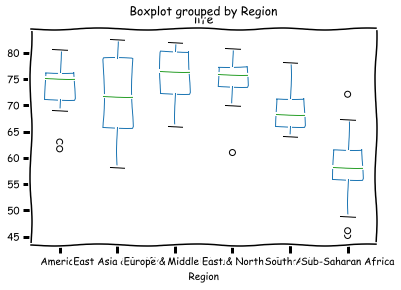

In [11]:
d.boxplot('life','Region')

In [12]:
df=pd.get_dummies(d)
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0,0


In [13]:
df.drop('Region_Sub-Saharan Africa',axis=1,inplace=True)
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,0,1,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,1,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,0,1,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,0,1,0,0,0


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr=LinearRegression()
x=df.drop('life',axis=1).values
y=df['life'].values

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8219419939586381

In [16]:
df1=pd.read_csv('./diabetes.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df1.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
filter=(df1['bmi']==0)
f2= (df1['glucose']==0)
f3=(df1['diastolic']==0)
print(df1[filter],'\n',df1[f2],'\n',df1[f3])

     pregnancies  glucose  diastolic  triceps  insulin  bmi    dpf  age  \
9              8      125         96        0        0  0.0  0.232   54   
49             7      105          0        0        0  0.0  0.305   24   
60             2       84          0        0        0  0.0  0.304   21   
81             2       74          0        0        0  0.0  0.102   22   
145            0      102         75       23        0  0.0  0.572   21   
371            0      118         64       23       89  0.0  1.731   21   
426            0       94          0        0        0  0.0  0.256   25   
494            3       80          0        0        0  0.0  0.174   22   
522            6      114          0        0        0  0.0  0.189   26   
684            5      136         82        0        0  0.0  0.640   69   
706           10      115          0        0        0  0.0  0.261   30   

     diabetes  
9           1  
49          0  
60          0  
81          0  
145         0  
371

In [19]:
import numpy as np
df1.insulin.replace(0,np.nan,inplace=True)
df1.triceps.replace(0,np.nan,inplace=True)
df1.glucose.replace(0,np.nan,inplace=True)
df1.bmi.replace(0,np.nan,inplace=True)
df1.diastolic.replace(0,np.nan,inplace=True)

In [20]:
df1.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [21]:
df1.isnull()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,True,True,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False


In [22]:
df1.isnull().sum()

pregnancies      0
glucose          5
diastolic       35
triceps        227
insulin        374
bmi             11
dpf              0
age              0
diabetes         0
dtype: int64

In [23]:
from sklearn.preprocessing import Imputer
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]
print(x.shape,'\n',y.shape)
imp=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp.fit(x)
x=imp.transform(x)
df_n=pd.DataFrame(x[:10])
print(df_n)
np.isnan(x).sum()

(768, 8) 
 (768,)
      0      1          2         3           4          5      6     7
0   6.0  148.0  72.000000  35.00000  155.548223  33.600000  0.627  50.0
1   1.0   85.0  66.000000  29.00000  155.548223  26.600000  0.351  31.0
2   8.0  183.0  64.000000  29.15342  155.548223  23.300000  0.672  32.0
3   1.0   89.0  66.000000  23.00000   94.000000  28.100000  0.167  21.0
4   0.0  137.0  40.000000  35.00000  168.000000  43.100000  2.288  33.0
5   5.0  116.0  74.000000  29.15342  155.548223  25.600000  0.201  30.0
6   3.0   78.0  50.000000  32.00000   88.000000  31.000000  0.248  26.0
7  10.0  115.0  72.405184  29.15342  155.548223  35.300000  0.134  29.0
8   2.0  197.0  70.000000  45.00000  543.000000  30.500000  0.158  53.0
9   8.0  125.0  96.000000  29.15342  155.548223  32.457464  0.232  54.0


0

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
steps=[('imp',Imputer(missing_values='NaN',strategy='mean',axis=0)),('clf',KNeighborsClassifier(n_neighbors=6))]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=69)
pipeline=Pipeline(steps)
pipeline.fit(X_train,y_train)
pipeline.predict(X_test)
pipeline.score(X_test,y_test)

0.7142857142857143

## Assignment-2

In [25]:
datfr=pd.read_csv('house-votes-84-updated.csv')

In [26]:
datfr.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [27]:
datfr.head(20)

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


In [28]:
x=datfr.columns
print(x)

Index(['party', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')


In [29]:
for i in x:
    f=(datfr[i]=='?')
    print(datfr[f])

Empty DataFrame
Columns: [party, handicapped-infants, water-project-cost-sharing, adoption-of-the-budget-resolution, physician-fee-freeze, el-salvador-aid, religious-groups-in-schools, anti-satellite-test-ban, aid-to-nicaraguan-contras, mx-missile, immigration, synfuels-corporation-cutback, education-spending, superfund-right-to-sue, crime, duty-free-exports, export-administration-act-south-africa]
Index: []
          party handicapped-infants water-project-cost-sharing  \
2      democrat                   ?                          y   
104    democrat                   ?                          ?   
129    democrat                   ?                          ?   
143    democrat                   ?                          y   
178    democrat                   ?                          n   
180    democrat                   ?                          ?   
183    democrat                   ?                          ?   
248  republican                   ?                         

424     y                 y                                      y  
          party handicapped-infants water-project-cost-sharing  \
54     democrat                   y                          y   
103    democrat                   y                          n   
107  republican                   n                          ?   
170    democrat                   y                          n   
183    democrat                   ?                          ?   
247  republican                   n                          y   
248  republican                   ?                          ?   
286    democrat                   n                          n   
290    democrat                   y                          n   
295  republican                   n                          y   
377  republican                   n                          y   
380    democrat                   y                          y   
390    democrat                   ?                          ?   
433  re

413     y                 n                                      y  
          party handicapped-infants water-project-cost-sharing  \
4      democrat                   y                          y   
10   republican                   n                          y   
11   republican                   n                          y   
13     democrat                   y                          y   
18   republican                   n                          y   
22     democrat                   y                          ?   
64     democrat                   y                          y   
89   republican                   n                          n   
95     democrat                   y                          n   
107  republican                   n                          ?   
115    democrat                   n                          ?   
129    democrat                   ?                          ?   
151    democrat                   y                          y   
177    

In [30]:
for i in x:
    datfr[i].replace('?',np.nan,inplace=True)

In [31]:
datfr.isnull().sum()

party                                       0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [32]:
datf=pd.get_dummies(datfr)
datf.head()

,party_democrat,party_republican,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
0,0,1,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,1,0,0,1
1,0,1,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,1,0,0,0
2,1,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
3,1,0,1,0,0,1,0,1,1,0,...,1,0,0,1,1,0,1,0,0,1
4,1,0,0,1,0,1,0,1,1,0,...,0,0,0,1,0,1,0,1,0,1


In [33]:
imp=Imputer(missing_values='NaN',strategy='most_frequent',axis=0)

In [34]:
x=datf.iloc[:,1:]
y=datf.iloc[:,1]
stp=[('imp',Imputer(missing_values='NaN',strategy='most_frequent',axis=0)),('clf',KNeighborsClassifier(n_neighbors=7))]
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.3,random_state=69)
pip=Pipeline(stp)
pip.fit(x_tr,y_tr)
pip.predict(x_ts)
pip.score(x_ts,y_ts)

0.9618320610687023

In [35]:
x_tr

,party_republican,handicapped-infants_n,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,physician-fee-freeze_y,el-salvador-aid_n,...,education-spending_n,education-spending_y,superfund-right-to-sue_n,superfund-right-to-sue_y,crime_n,crime_y,duty-free-exports_n,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_y
415,0,1,0,0,1,0,1,1,0,1,...,1,0,1,0,1,0,1,0,0,1
63,0,0,1,0,1,0,1,1,0,1,...,1,0,1,0,1,0,1,0,0,1
30,1,1,0,0,1,1,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
365,0,1,0,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,0,1,0
305,1,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,1,0,1,0
277,1,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,1,1,0,0,1
276,1,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,0,1,1,0
42,0,0,1,1,0,0,1,1,0,1,...,1,0,1,0,1,0,1,0,0,1
433,1,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,1,1,0,0,1
402,1,0,0,1,0,0,1,0,1,1,...,0,1,1,0,0,1,1,0,0,1


In [36]:
x_tr.isnull().sum()

party_republican                            0
handicapped-infants_n                       0
handicapped-infants_y                       0
water-project-cost-sharing_n                0
water-project-cost-sharing_y                0
adoption-of-the-budget-resolution_n         0
adoption-of-the-budget-resolution_y         0
physician-fee-freeze_n                      0
physician-fee-freeze_y                      0
el-salvador-aid_n                           0
el-salvador-aid_y                           0
religious-groups-in-schools_n               0
religious-groups-in-schools_y               0
anti-satellite-test-ban_n                   0
anti-satellite-test-ban_y                   0
aid-to-nicaraguan-contras_n                 0
aid-to-nicaraguan-contras_y                 0
mx-missile_n                                0
mx-missile_y                                0
immigration_n                               0
immigration_y                               0
synfuels-corporation-cutback_n    

## Assigment-3

In [37]:
data=pd.read_csv('./winequality-red.csv',delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
scaler=StandardScaler()
knn=KNeighborsClassifier(n_neighbors=20)
steps=[('scale',scaler),('clf',knn)]
pipe=Pipeline(steps)
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
pipe.fit(X_train,y_train)
pipe.predict(X_test)
pipe.score(X_test,y_test)

0.5458333333333333

In [40]:
knn2=KNeighborsClassifier(n_neighbors = 20)
knn2.fit(X_train,y_train)
knn2.score(X_test,y_test)

0.4979166666666667

In [41]:
dat=pd.read_csv('./white-wine.csv')
dat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [42]:
from sklearn.preprocessing import scale
c=dat.columns[:-1]
for i in c:
    dat[c]=scale(dat[c])
dat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,6
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,6
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,6
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,6


In [43]:
for i in c:
    print(i,'mean= ',np.mean(dat[i]),'std= ',np.std(dat[i]))

fixed acidity mean=  1.6814280107532484e-16 std=  0.9999999999999948
volatile acidity mean=  -1.7240417160675664e-16 std=  0.9999999999999953
citric acid mean=  6.019639212937991e-16 std=  1.0000000000000144
residual sugar mean=  5.884318031700503e-17 std=  0.9999999999999959
chlorides mean=  6.641391306965513e-17 std=  1.0000000000000016
free sulfur dioxide mean=  -4.336171184377143e-17 std=  1.0000000000000049
total sulfur dioxide mean=  7.23072978471672e-18 std=  1.0
density mean=  -3.1892278392151804e-16 std=  0.9999999999999999
pH mean=  8.063737056153521e-17 std=  0.9999999999999949
sulphates mean=  1.151476718067741e-16 std=  0.9999999999999994
alcohol mean=  -1.4587033998923505e-15 std=  1.0000000000000036


In [46]:
scaler2=StandardScaler()
knn2=KNeighborsClassifier(n_neighbors=20)
imp=Imputer(missing_values='NaN',strategy='median',axis=0)
steps=[('imp',imp),('scale',scaler2),('clf',knn2)]
steps2=[('imp',imp),('clf',knn2)]
pipeline=Pipeline(steps)
pipeline2=Pipeline(steps2)
x=dat.iloc[:,:-1]
y=dat.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
pipeline2.fit(X_train,y_train)
pipeline2.predict(X_test)
print(pipeline2.score(X_test,y_test))
pipeline.fit(X_train,y_train)
pipeline.predict(X_test)
pipeline.score(X_test,y_test)

0.5496598639455782


0.5469387755102041